In [ ]:
"""LogisticRegression_Binary.ipynb

Automatically generated by Colab.

Original file is located at
    https://colab.research.google.com/drive/1M8PXdcmPsrQtqyVXpET3sgghAMr_MCg5
"""

# Commented out IPython magic to ensure Python compatibility.
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
#"%matplotlib inline" will make your plot outputs appear and be stored within the notebook.



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/ML_LAB/Lab-3/HR_comma_sep.csv")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


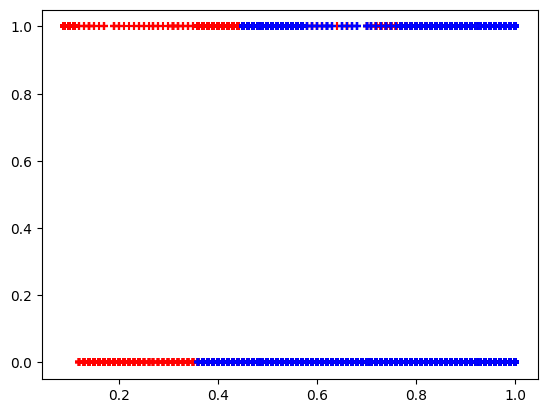

In [ ]:
plt.scatter(df.satisfaction_level,df.left,marker='+',color='red')
plt.scatter(df.last_evaluation,df.left,marker='+',color='blue')



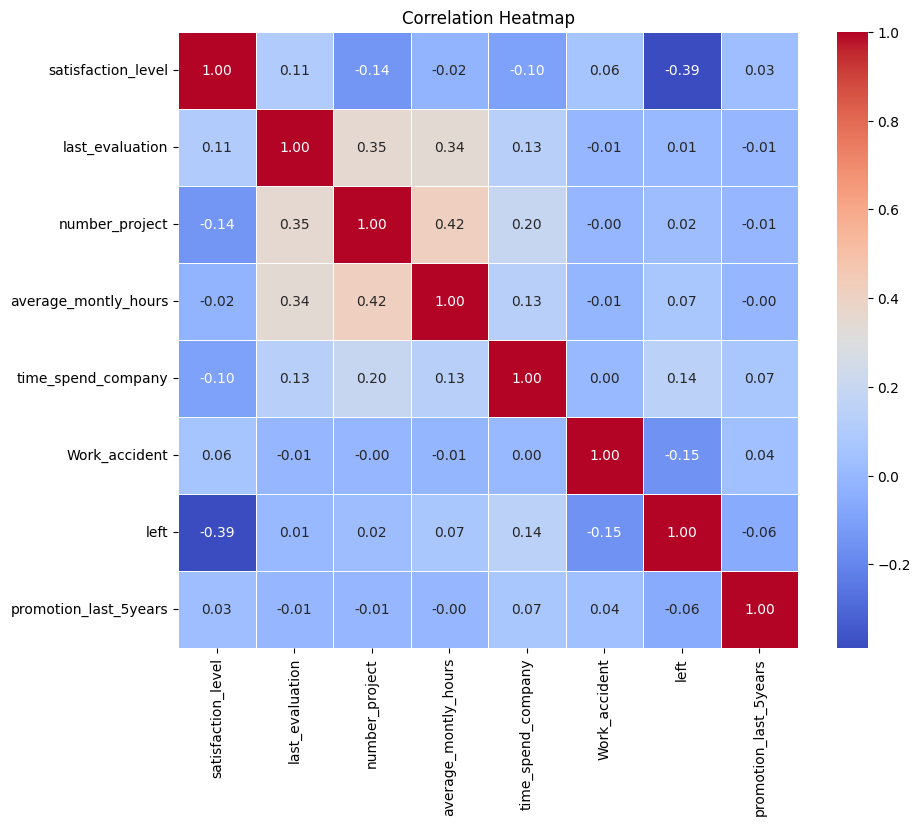

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample DataFrame (replace this with your actual dataset)
# df = pd.read_csv('your_dataset.csv')
df_numeric = df.select_dtypes(include=['number'])

# Compute the correlation matrix
correlation_matrix = df_numeric.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Display the plot
plt.title("Correlation Heatmap")
plt.show()


   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years Department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   

   salary  
0     low  
1  medium  
2 

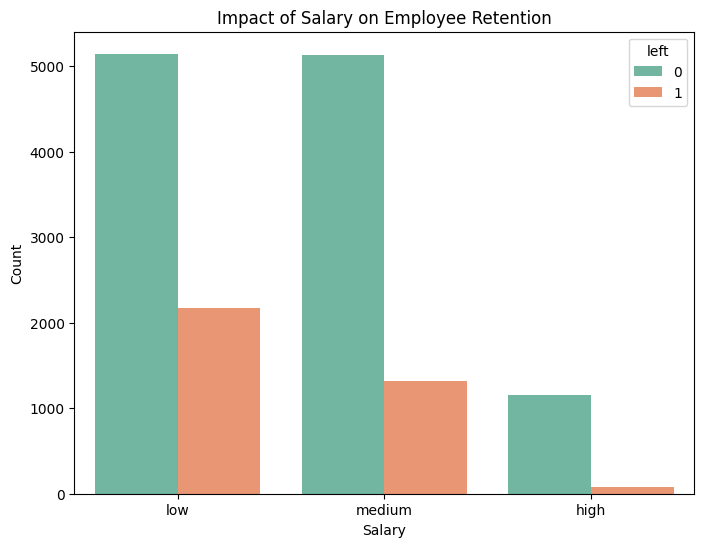

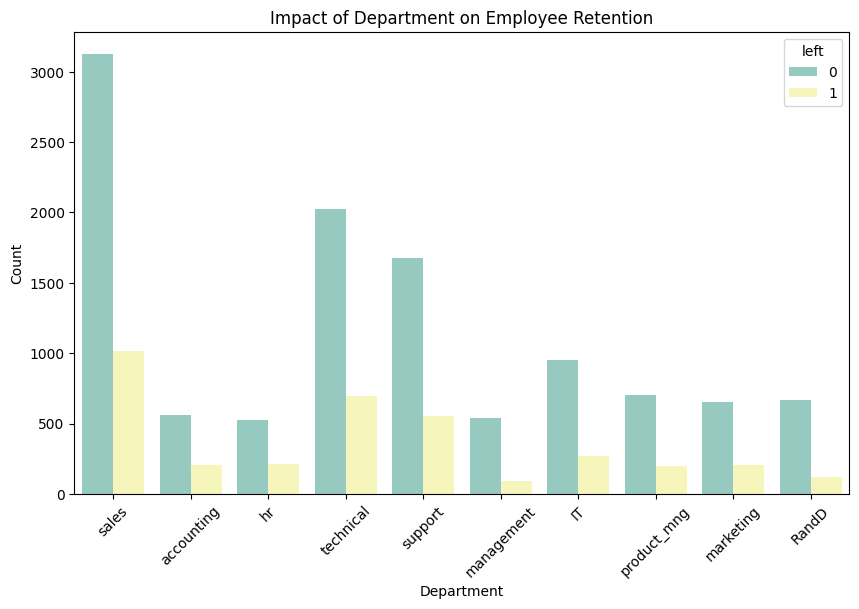

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Load the data
data = pd.read_csv('/content/drive/MyDrive/ML_LAB/Lab-3/HR_comma_sep.csv')  # Replace with your actual dataset

# Inspect the first few rows
print(data.head())

# Step 1: Exploratory Data Analysis (EDA)

# Bar chart showing impact of employee salaries on retention
plt.figure(figsize=(8, 6))
sns.countplot(x='salary', hue='left', data=data, palette='Set2')
plt.title('Impact of Salary on Employee Retention')
plt.xlabel('Salary')
plt.ylabel('Count')
plt.show()

# Bar chart showing correlation between department and employee retention
plt.figure(figsize=(10, 6))
sns.countplot(x='Department', hue='left', data=data, palette='Set3')
plt.title('Impact of Department on Employee Retention')
plt.xlabel('Department')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()



Accuracy of the Logistic Regression model: 80.40%
Confusion Matrix:
[[1078   75]
 [ 219  128]]


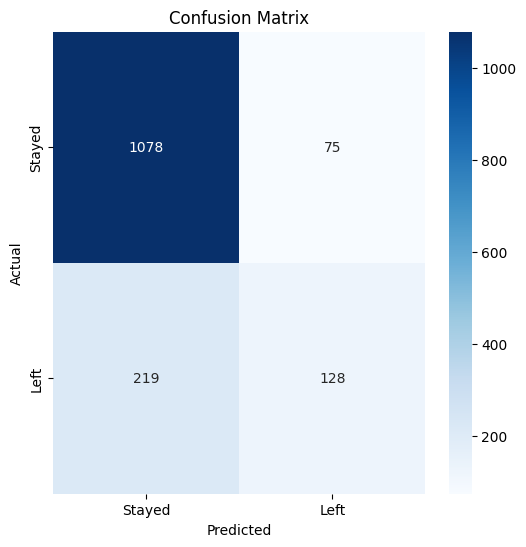

In [ ]:
# Step 2: Feature Engineering

# Convert categorical features into numerical
data = pd.get_dummies(data, columns=['Department', 'salary'], drop_first=True)

# Step 3: Logistic Regression Model

# Define features (X) and target (y)
X = data.drop('left', axis=1)
y = data['left']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9, random_state=10)

# Initialize and train the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Step 4: Evaluate the Model

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of the Logistic Regression model: {accuracy * 100:.2f}%')

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

# Visualize the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Stayed', 'Left'], yticklabels=['Stayed', 'Left'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

X = df[['satisfaction_level']]  # Add more features as needed
y = df['left']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9, random_state=10)

# Checking the shape of the training data
print(X_train.shape)


(13499, 1)


In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)

model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
y_predicted = model.predict(X_test)
y_predicted

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
model.score(X_test,y_test)

model.predict_proba(X_test)

y_predicted = model.predict([[0.72]])
y_predicted

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

In [ ]:
#model.coef_ indicates value of m in y=m*x + b equation
model.coef_

array([[-3.80788473]])

In [ ]:
#model.intercept_ indicates value of b in y=m*x + b equation
model.intercept_

array([0.96691373])

In [ ]:
#Lets defined sigmoid function now and do the math with hand
import math
def sigmoid(x):
  return 1 / (1 + math.exp(-x))

def prediction_function(age):
   z = -3.80788 * s + 0.9669 # 0.12740563 ~ 0.0127 and -4.97335111 ~ -4.97
   y = sigmoid(z)
   return y

s = 35
prediction_function(s)

3.459193237934442e-58

Accuracy of the Logistic Regression model: 77.07%
Confusion Matrix:
[[1063   90]
 [ 254   93]]


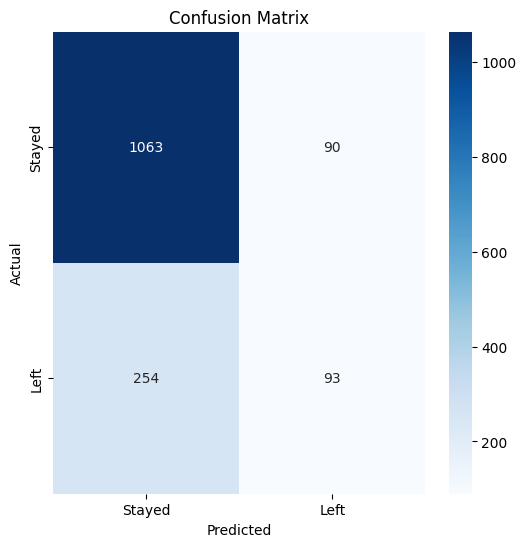

In [ ]:
# Predict on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of the Logistic Regression model: {accuracy * 100:.2f}%')

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

# Visualize the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Stayed', 'Left'], yticklabels=['Stayed', 'Left'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()